## Merging Scenario Selection of DS & TSC

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from ema_workbench import (save_results, load_results)

In [3]:
wcs_dss_resDF = pd.read_csv("wcs_100k_nfe_V4.csv")
wcs_tsc_resDF = pd.read_csv("wcs_tsc_results_only_util_V4.csv")

wcs_dss_resDF = wcs_dss_resDF.drop(wcs_dss_resDF.columns[0], axis = 1)
wcs_tsc_resDF = wcs_tsc_resDF.drop(wcs_tsc_resDF.columns[16:20], axis = 1)
wcs_tsc_resDF = wcs_tsc_resDF.drop(wcs_tsc_resDF.columns[0], axis = 1)
wcs_tsc_resDF = wcs_tsc_resDF.drop("scenario", axis = 1)

In [4]:
for _ in wcs_tsc_resDF.columns[8:14].to_list():
    wcs_dss_resDF[_] = wcs_tsc_resDF[_][0]

In [5]:
wcs_sce_DF = pd.concat([wcs_dss_resDF,wcs_tsc_resDF], axis = 0, sort = True).reset_index(drop = True)

wcs_sce_DF['scenario'] = wcs_sce_DF.index

In [6]:
wcs_sce_DF = wcs_sce_DF.drop_duplicates(inplace = False)

In [7]:
outDF = wcs_sce_DF.iloc[:,0:20]
experiments = wcs_sce_DF.iloc[:,20:]

In [8]:
outcomes = {}
for _ in outDF.columns:
    outcomes[_] = outDF[_].to_numpy()

In [9]:
results = experiments, outcomes

In [10]:
file_name = 'scenario_selection_30k_scen_100k_nfe_only_util.tar.gz'
# save_results(results, file_name)
# results = load_results(file_name)

## Scenario Selection

### Import results from scenario selection script

In [11]:
results = load_results(file_name)

experiments, outcomes = results

### Plot the selected scenarios in contrast to the set of wcs

In [12]:
f = open("output_scenarioselection.txt", "r")
scenario_txt = f.read()[-26:-6]
scenario_lst = eval(scenario_txt)

In [13]:
scenario_lst

[102, 354, 467, 473]

##### maximum diversity and solutions: 2.2072346889837697, [[array([102, 354, 467, 473])]] 

In [14]:
out_df = outDF.copy()

In [15]:
def scen_func(x):
    if x == scenario_lst[0]:
        return "scenario " + str(scenario_lst[0])
    elif x == scenario_lst[1]:
        return "scenario " + str(scenario_lst[1])
    elif x == scenario_lst[2]:
        return "scenario " + str(scenario_lst[2])
    elif x == scenario_lst[3]:
        return "scenario " + str(scenario_lst[3])
    else:
        return "policy relevant"

In [16]:
out_df["selected"] = out_df.index.map(scen_func)

In [17]:
out2300_df = out_df.iloc[:,4::5].T.append(out_df["selected"]).T

In [18]:
clr_palette = ([(0.66,0.66,0.66),sns.color_palette("inferno", 15)[-3],sns.color_palette("YlGn", 10)[-4],
                sns.color_palette("viridis", 10)[3],sns.cubehelix_palette(10)[5]])

C:\Users\Shajee\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Shajee\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Shajee\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Shajee\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Users\Shajee\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeW

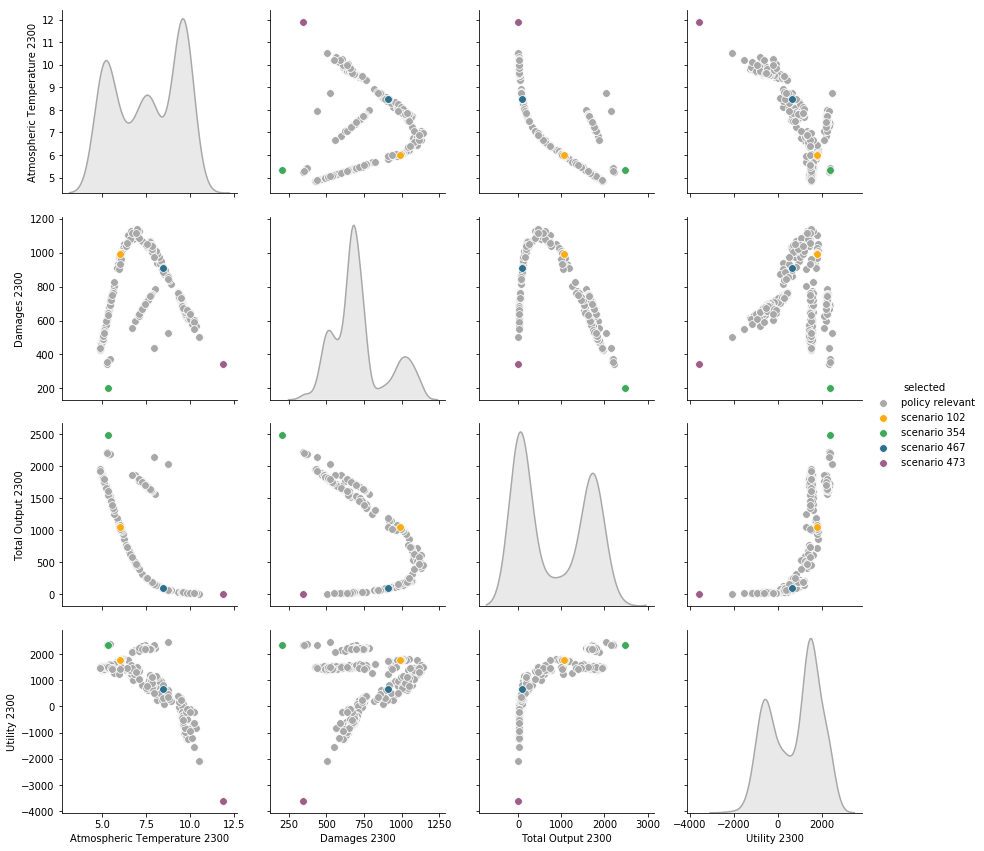

In [19]:
scen_select_pp = sns.pairplot(out2300_df, hue = "selected", palette = clr_palette, diag_kind = "auto", height=3, plot_kws={"s": 60})
plt.show()

scen_select_pp.fig.savefig("scenario_selection_pairplot.png", bbox_inches='tight')

In [20]:
experiments["selected"] = out_df.index.map(lambda x: "True" if x == scenario_lst[0] or x == scenario_lst[1] or x == scenario_lst[2] or x == scenario_lst[3] else "False")

In [21]:
drop_cols = list(experiments.columns[3:8]) + list(experiments.columns[10:11]) + list(experiments.columns[14:15])

In [22]:
exp_df = experiments.drop(drop_cols, axis=1)

In [23]:
sel_scenarios = exp_df[exp_df["selected"] == "True"].drop("selected", axis=1)

In [24]:
sel_scenarios

,cback,fdamage,fosslim,pop_gr,sigma_gr,t2xco2_dist,t2xco2_index,tfp_gr
102,103.0,2.0,5264.484587,0.100000,-0.011898,2.0,309.0,0.080647
354,143.0,0.0,5635.084536,0.103253,-0.008141,2.0,257.0,0.070770
467,290.0,2.0,5591.249716,0.149353,-0.009790,2.0,463.0,0.076383
473,376.0,2.0,11215.865892,0.120957,-0.008306,2.0,257.0,0.074732


In [25]:
sel_scenarios.to_csv("selected_scenarios_only_util_tsc_V4.csv")